In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import sklearn
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_scorep

In [2]:
#import data
data = pd.read_csv('data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [5]:
#check null value
print(data.isnull().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [6]:
[print(col) for col in data if data[col].isna().sum() > 0]

[]

In [7]:
#check duplicate data
data.duplicated().sum()

0

In [8]:
#target variable distribution check
print(data['Bankrupt?'].value_counts())
print('-'* 30)
print('Not bankrupt', round(data['Bankrupt?'].value_counts()[0]/len(data) * 100,2), '%')
print('Bankrupt', round(data['Bankrupt?'].value_counts()[1]/len(data) * 100,2), '%')

0    6599
1     220
Name: Bankrupt?, dtype: int64
------------------------------
Not bankrupt 96.77 %
Bankrupt 3.23 %


C:\Users\fritz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


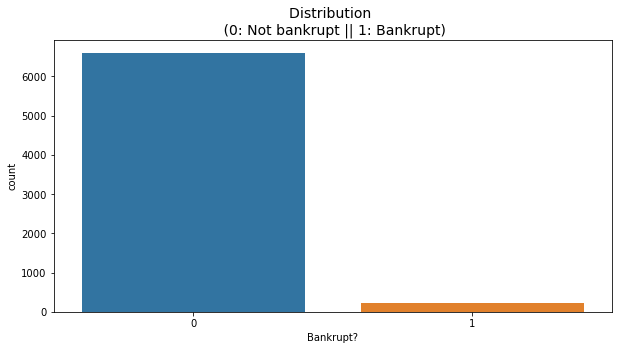

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(data['Bankrupt?'])
plt.title('Distribution \n (0: Not bankrupt || 1: Bankrupt)', fontsize=14)
plt.show()

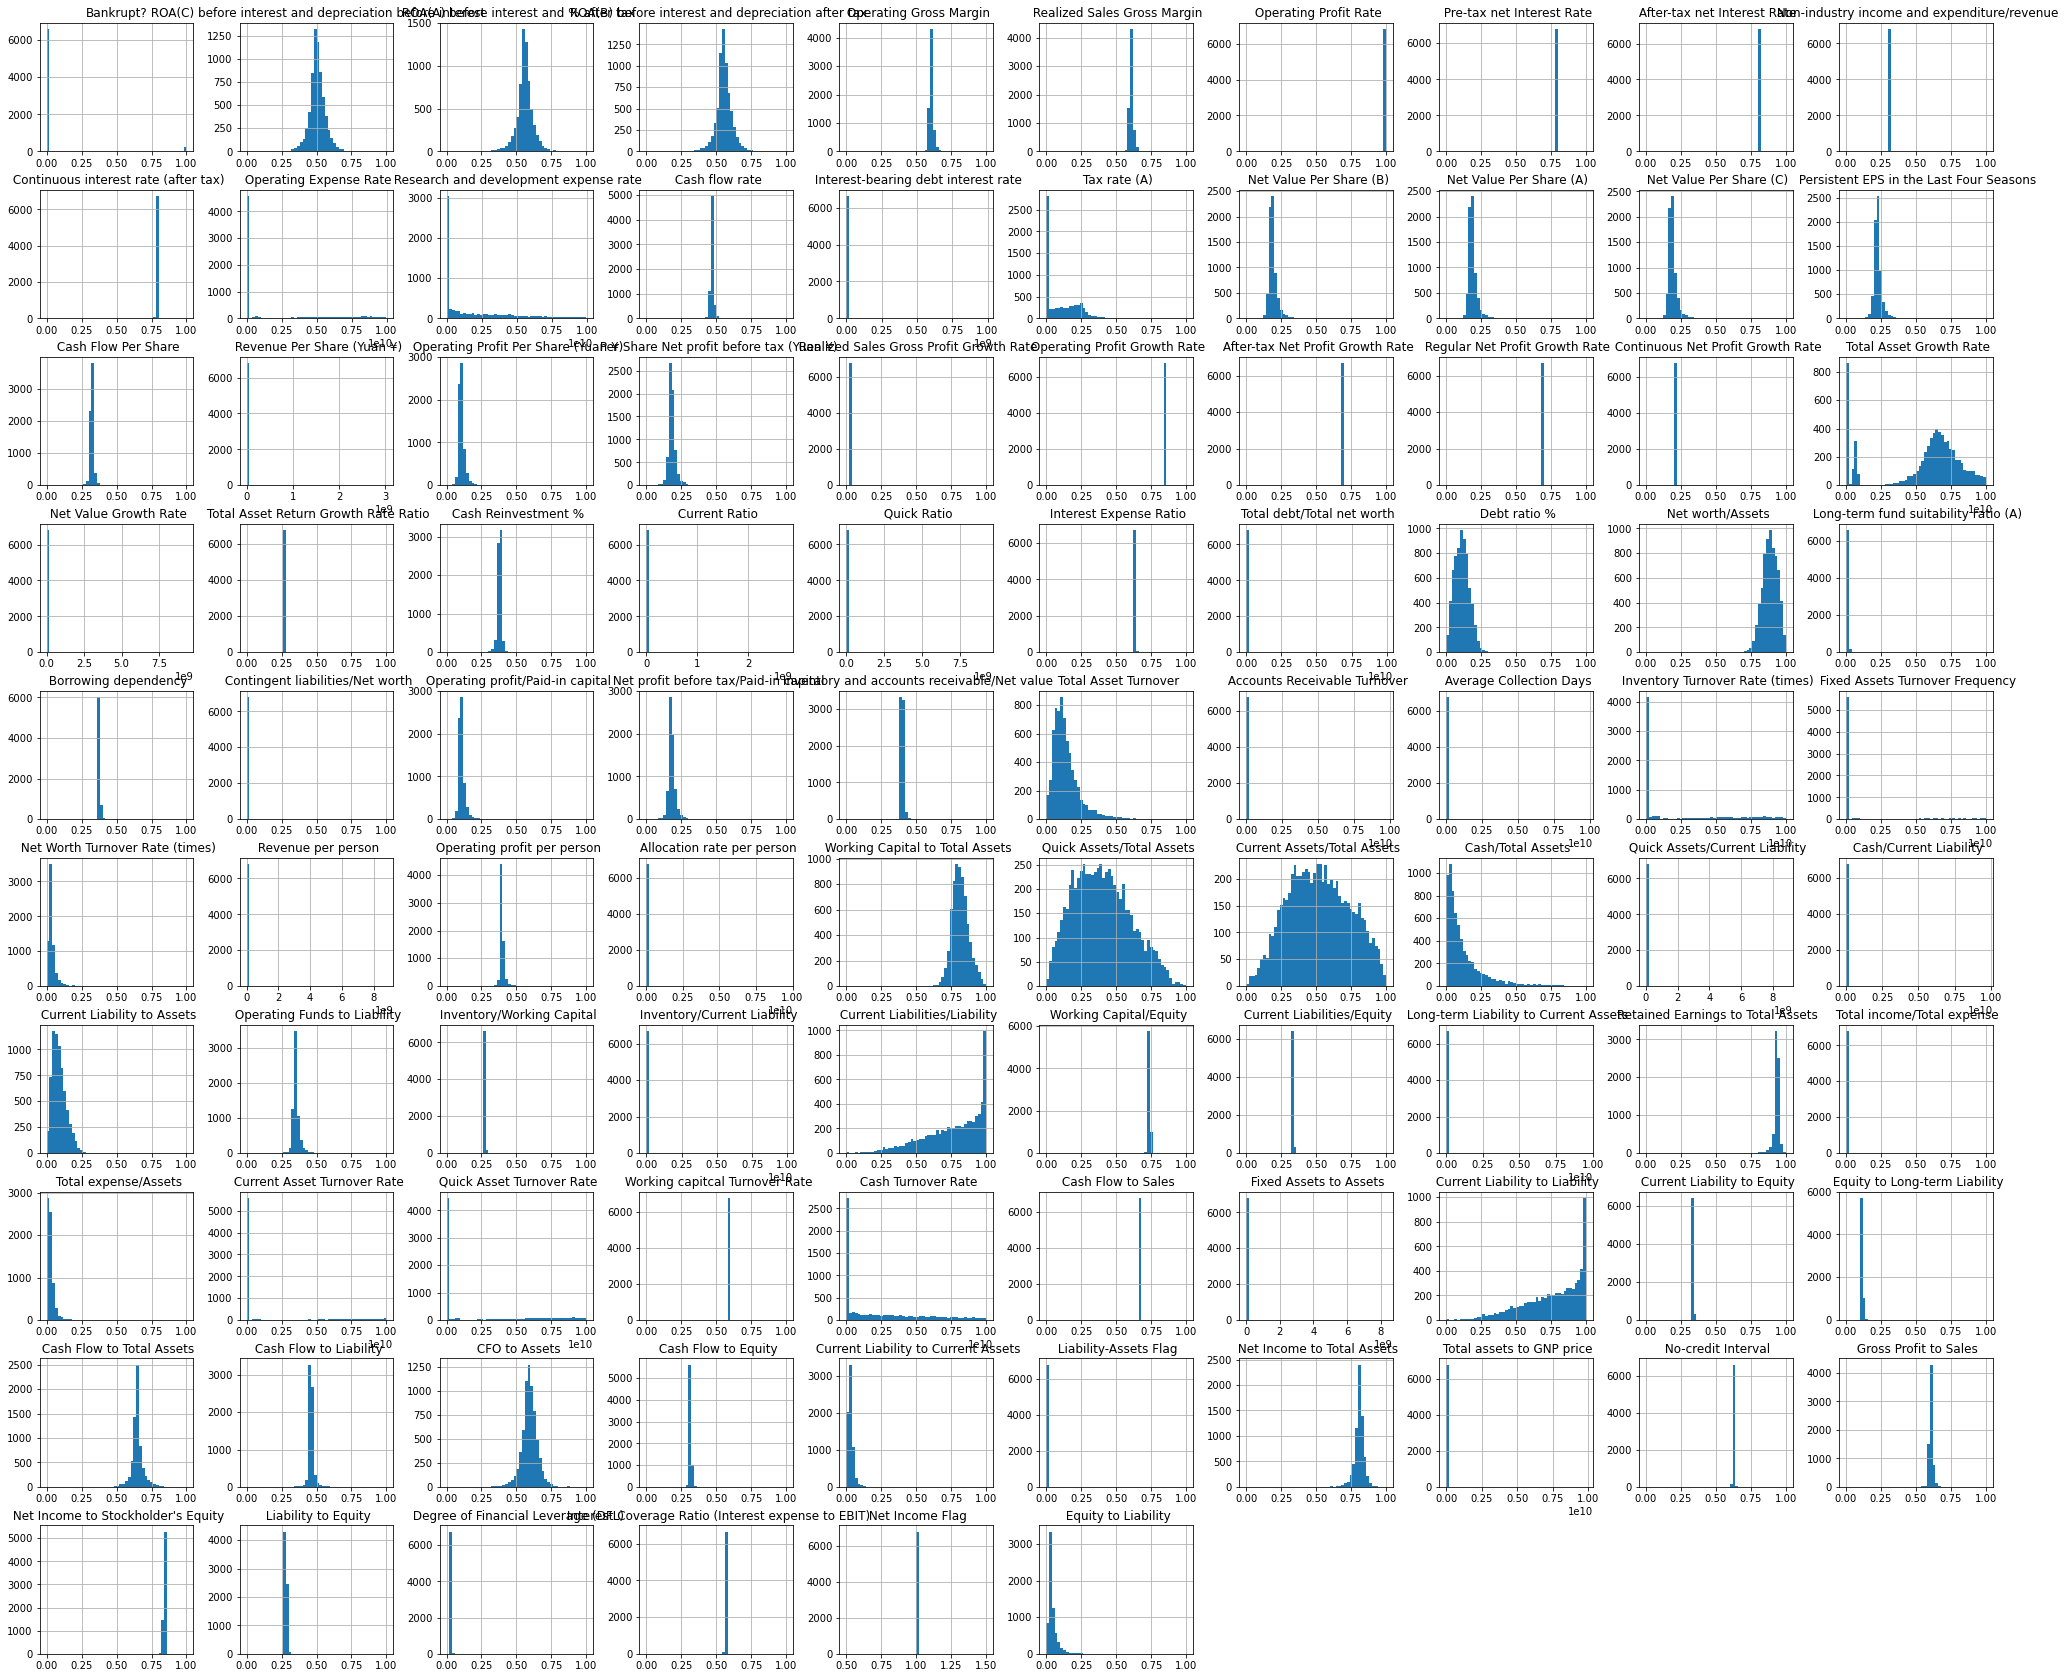

In [10]:
#data distribution check
data.hist(figsize = (35,30), bins = 50)
plt.show()

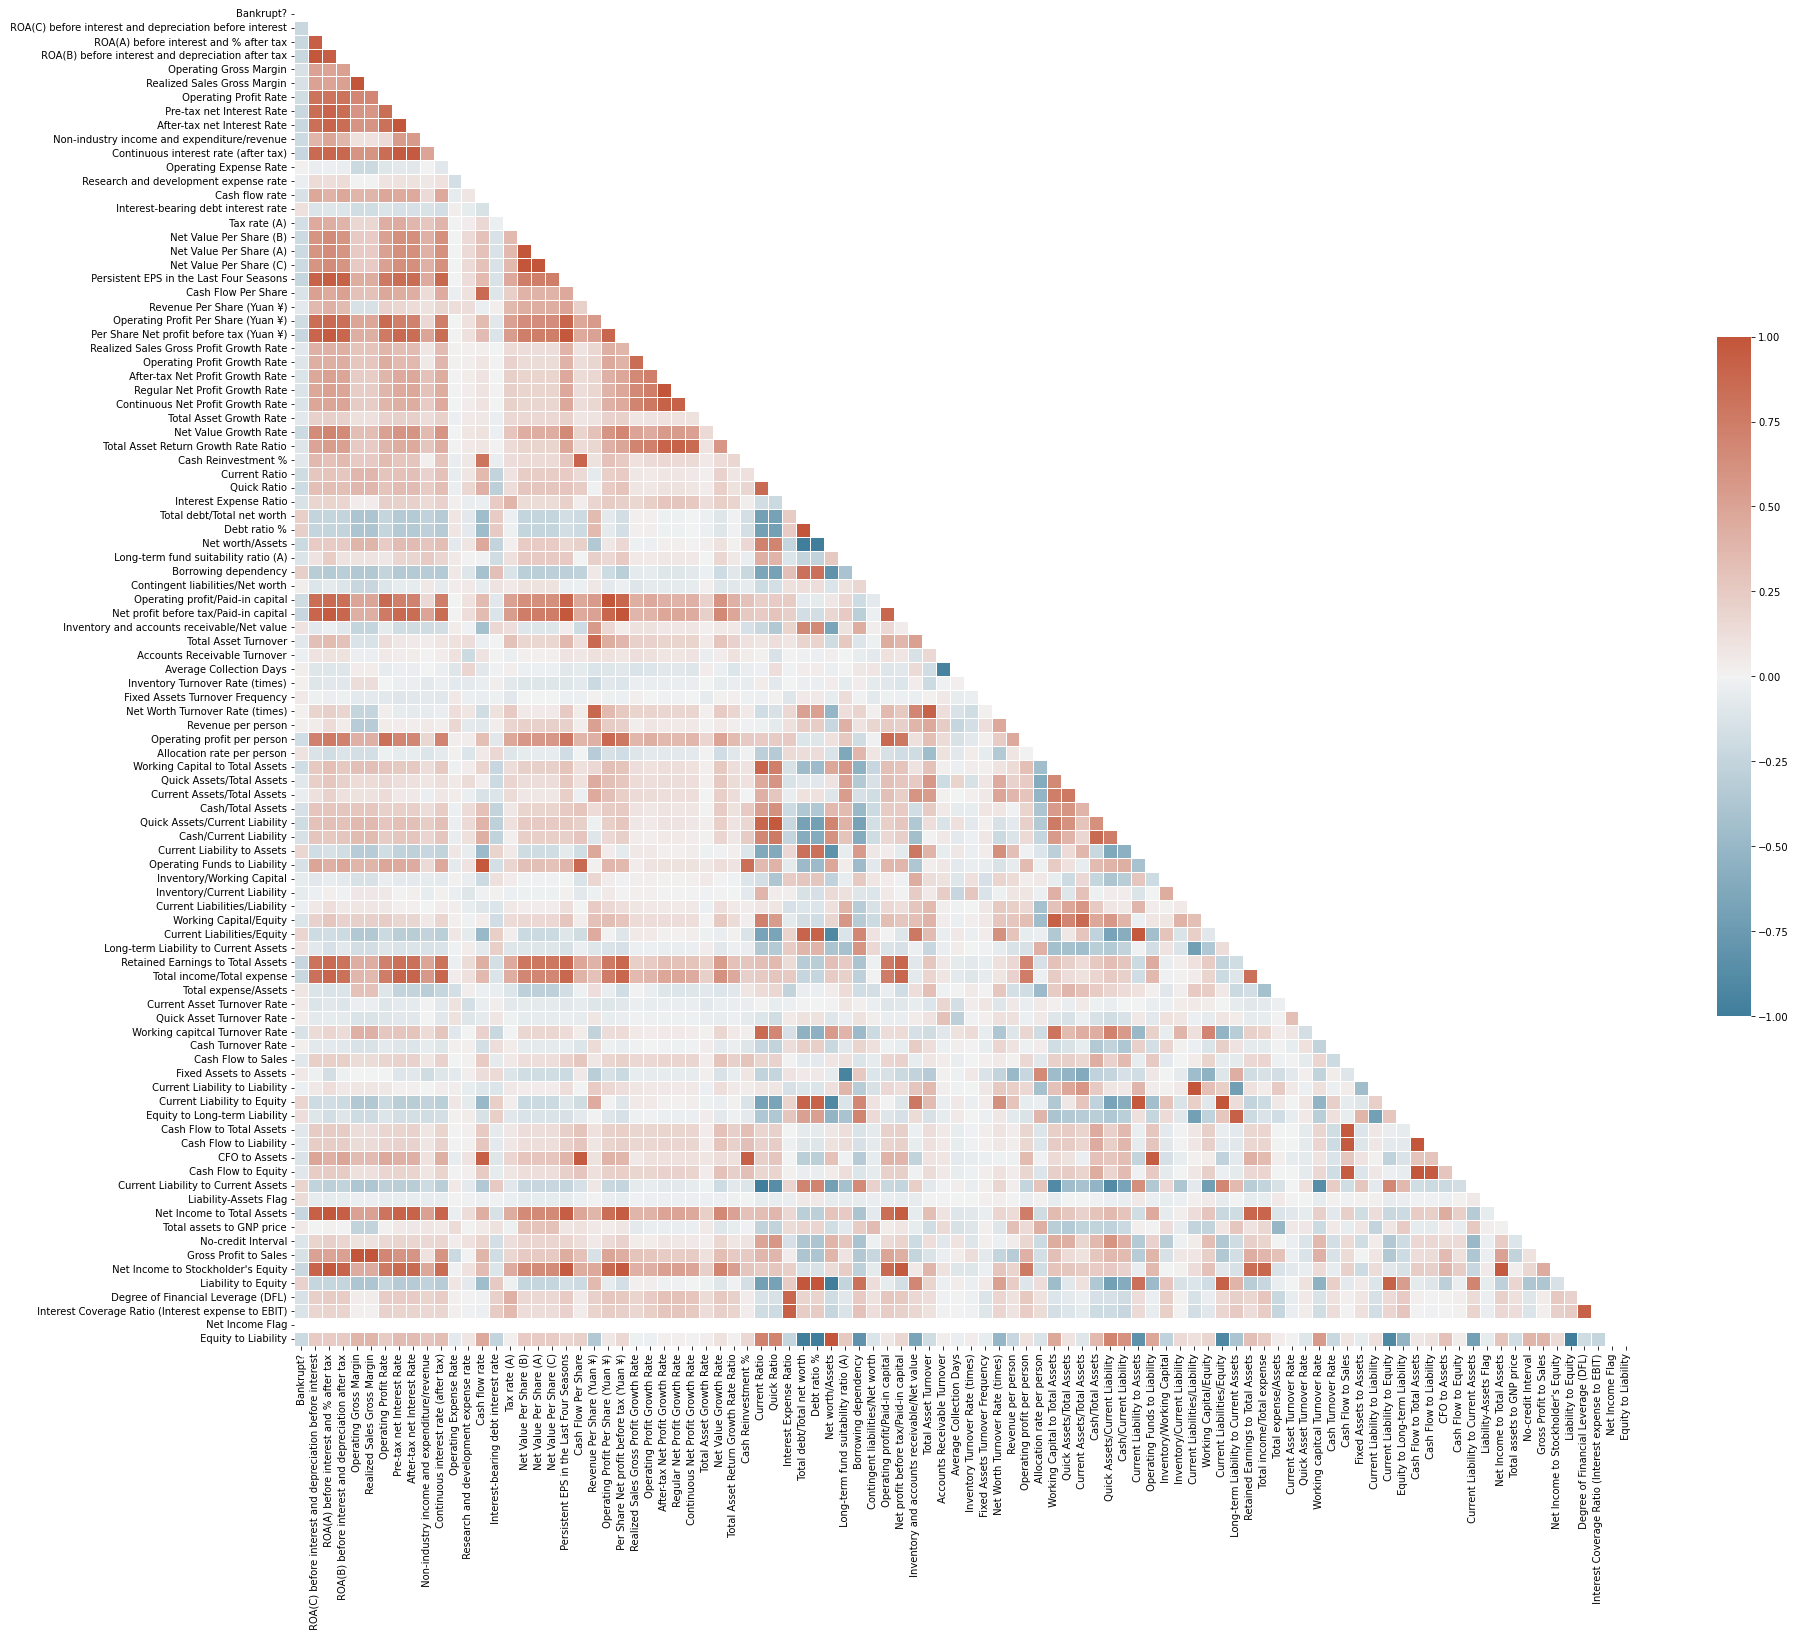

In [11]:
#correlation check
f, ax = plt.subplots(figsize=(30, 25))
mat = data.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

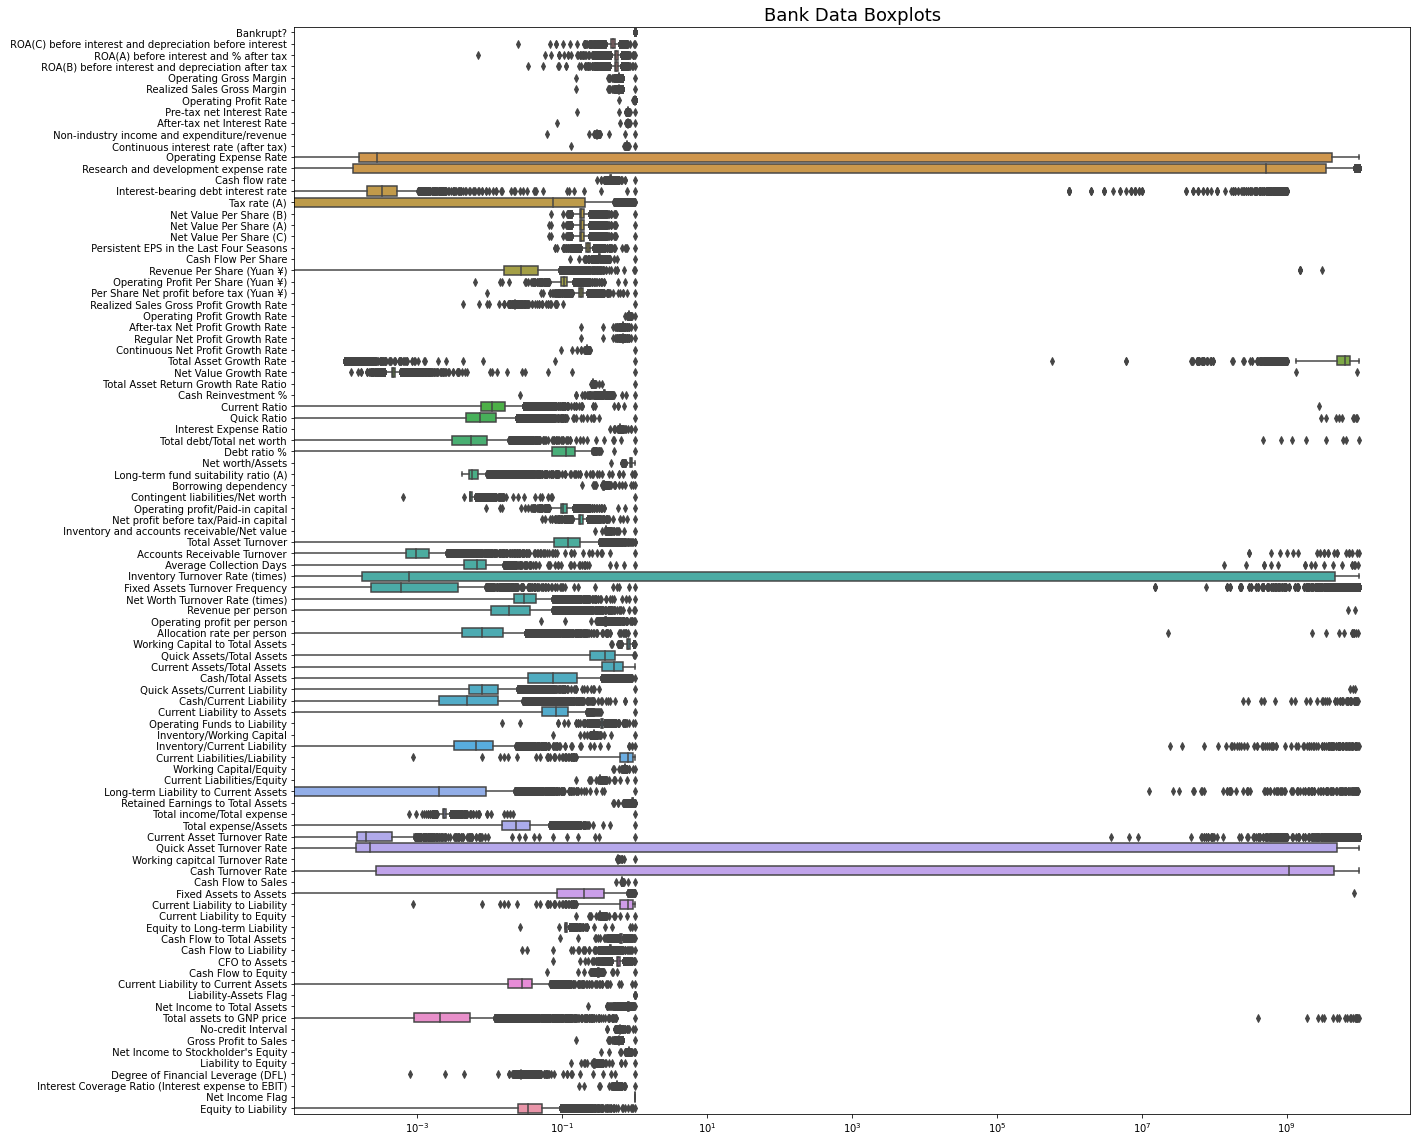

In [12]:
#boxplot to detect outlier

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = data, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [13]:
#remove outlier
def outliers_removal(feature,feature_name,dataset):
    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in data:
    new_df = outliers_removal(data[col],str(col),data)

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
 ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
 ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.53554295682512 | Quartile 75: 0.58915721761884
iqr: 0.05361426079372
Cut Off: 0.08042139119058
 ROA(A) before interest and % after tax Lower: 0.45512156563454
 ROA(A) before interest and % after tax Upper: 0.66957860880942
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
-------

 Inventory Turnover Rate (times) outliers for close to bankruptcy cases: 0
-----------------------------------------------------------------
Quartile 25: 0.0002330013064716 | Quartile 75: 0.0036523711287173
iqr: 0.0034193698222457
Cut Off: 0.00512905473336855
 Fixed Assets Turnover Frequency Lower: -0.00489605342689695
 Fixed Assets Turnover Frequency Upper: 0.00878142586208585
 Fixed Assets Turnover Frequency outliers for close to bankruptcy cases: 1418
-----------------------------------------------------------------
Quartile 25: 0.0217741935483871 | Quartile 75: 0.0429032258064516
iqr: 0.021129032258064503
Cut Off: 0.03169354838709675
 Net Worth Turnover Rate (times) Lower: -0.009919354838709652
 Net Worth Turnover Rate (times) Upper: 0.07459677419354835
 Net Worth Turnover Rate (times) outliers for close to bankruptcy cases: 513
-----------------------------------------------------------------
Quartile 25: 0.010432854016421151 | Quartile 75: 0.0358547655068079
iqr: 0.02542191149038

Quartile 25: 0.565158395757604 | Quartile 75: 0.565724709506105
iqr: 0.0005663137485010239
Cut Off: 0.0008494706227515358
 Interest Coverage Ratio (Interest expense to EBIT) Lower: 0.5643089251348524
 Interest Coverage Ratio (Interest expense to EBIT) Upper: 0.5665741801288565
 Interest Coverage Ratio (Interest expense to EBIT) outliers for close to bankruptcy cases: 1421
-----------------------------------------------------------------
Quartile 25: 1.0 | Quartile 75: 1.0
iqr: 0.0
Cut Off: 0.0
 Net Income Flag Lower: 1.0
 Net Income Flag Upper: 1.0
 Net Income Flag outliers for close to bankruptcy cases: 0
-----------------------------------------------------------------
Quartile 25: 0.024476693570910098 | Quartile 75: 0.052837817459331596
iqr: 0.028361123888421498
Cut Off: 0.04254168583263225
 Equity to Liability Lower: -0.018064992261722153
 Equity to Liability Upper: 0.09537950329196385
 Equity to Liability outliers for close to bankruptcy cases: 549
--------------------------------

### EDA Notes:
* No missing value in the dataset
* No duplicate value
* Imbalance distibution in target variable, will be handled later on
* No feature has significantly high correlation with target variable
* Some outliers are found, and has been removed from the dataset

## Build Model

In [14]:
labels = new_df['Bankrupt?']
new_df = new_df.drop(['Bankrupt?'], axis = 1)

In [15]:
#normalize data
def log_trans(data):
    
    for col in data:
        skew = data[col].skew()
        if skew > 0.5 or skew < -0.5:
            data[col] = np.log1p(data[col])
        else:
            continue
            
    return data

new_df = log_trans(new_df)

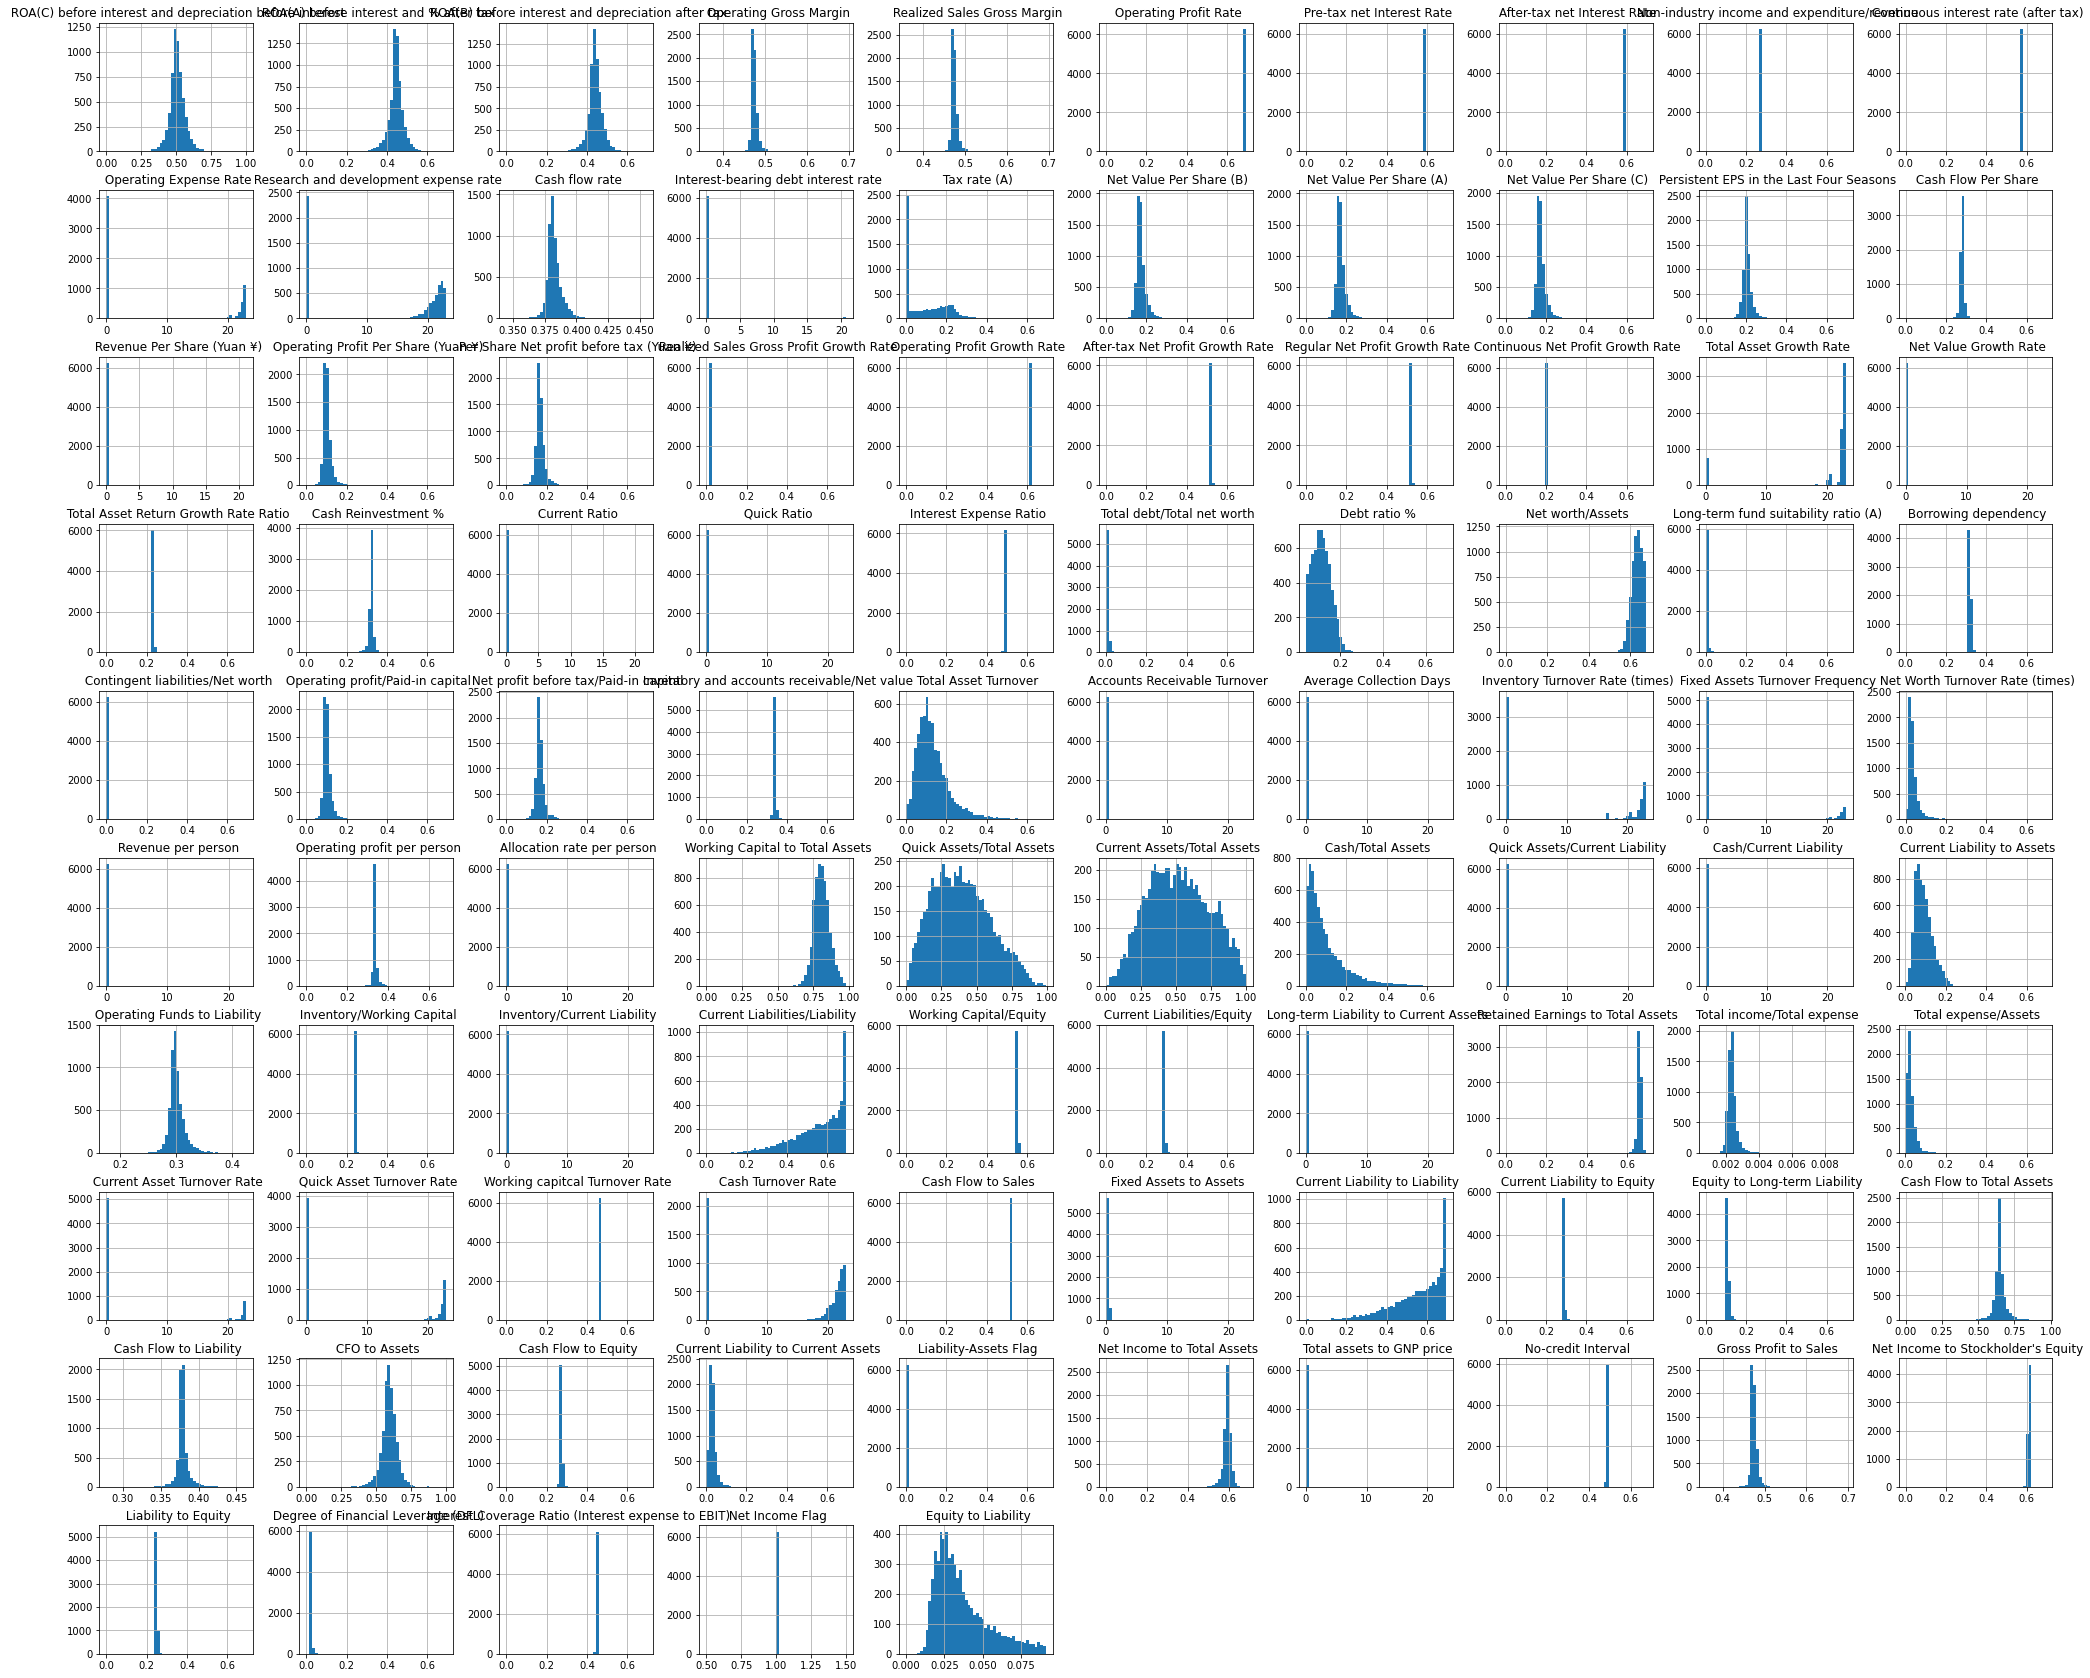

In [16]:
new_df.hist(figsize = (35,30),bins = 50)
plt.show()

In [17]:
#split train test data

X_train,X_test,y_train,y_test  = train_test_split(new_df,
                                              labels,
                                              test_size=0.2,
                                              stratify = labels,
                                              random_state = 42)

### Random Forest Classifier

In [18]:
rfc_model = RandomForestClassifier()
rfc_params = {'max_features' : ['auto', 'sqrt', 'log2'],
              'random_state' : [42],
              'class_weight' : ['balanced','balanced_subsample'],
              'criterion' : ['gini', 'entropy'],
              'bootstrap' : [True,False]}

grid_rfc_model = GridSearchCV(estimator=rfc_model, 
                                param_grid=rfc_params, 
                                cv=2,
                                verbose=1, 
                                n_jobs=3,
                                scoring="accuracy", 
                                return_train_score=True
                                 )
grid_rfc_model.fit(X_train, y_train)
grid_rfc_model.best_params_

Fitting 2 folds for each of 24 candidates, totalling 48 fits


C:\Users\fritz\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 'auto',
 'random_state': 42}

In [19]:
y_rfc_pred = grid_rfc_model.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_rfc_pred)
precision_rfc = precision_score(y_test, y_rfc_pred)
recall_rfc = recall_score(y_test, y_rfc_pred)
f1_rfc = f1_score(y_test, y_rfc_pred)

print('Logistic Regression results: \n')
print(f"Accuracy: {accuracy_rfc}")
print(f"Precision: {precision_rfc}")
print(f"Recall: {recall_rfc}")
print(f"F1 Score: {f1_rfc}")

Logistic Regression results: 

Accuracy: 0.9688995215311005
Precision: 0.7777777777777778
Recall: 0.1590909090909091
F1 Score: 0.2641509433962264


In [20]:
label = ['Non-default', 'Default']
print(classification_report(y_test, y_rfc_pred, target_names=label))

              precision    recall  f1-score   support

 Non-default       0.97      1.00      0.98      1210
     Default       0.78      0.16      0.26        44

    accuracy                           0.97      1254
   macro avg       0.87      0.58      0.62      1254
weighted avg       0.96      0.97      0.96      1254



### Support Vector Classifier

In [21]:
svc_model = SVC()
svc_params = {
    'C': [0.1, 1, 10],           
    'kernel': ['linear', 'rbf'], 
    'gamma': [0.1, 1, 'scale'],  
    'class_weight': [None, 'balanced'], 
}

grid_svc_model = GridSearchCV(estimator=svc_model, 
                                param_grid=svc_params, 
                                cv=2,
                                verbose=1, 
                                n_jobs=3,
                                scoring="accuracy", 
                                return_train_score=True
                                 )
grid_svc_model.fit(X_train, y_train)
grid_svc_model.best_params_

Fitting 2 folds for each of 36 candidates, totalling 72 fits


{'C': 10, 'class_weight': None, 'gamma': 0.1, 'kernel': 'linear'}

In [22]:
y_svc_pred = grid_svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_svc_pred)
precision_svc = precision_score(y_test, y_svc_pred)
recall_svc = recall_score(y_test, y_svc_pred)
f1_svc = f1_score(y_test, y_svc_pred)

print('Logistic Regression results: \n')
print(f"Accuracy: {accuracy_svc}")
print(f"Precision: {precision_svc}")
print(f"Recall: {recall_svc}")
print(f"F1 Score: {f1_svc}")

Logistic Regression results: 

Accuracy: 0.9665071770334929
Precision: 1.0
Recall: 0.045454545454545456
F1 Score: 0.08695652173913045


In [23]:
label = ['Non-default', 'Default']
print(classification_report(y_test, y_svc_pred, target_names=label))

              precision    recall  f1-score   support

 Non-default       0.97      1.00      0.98      1210
     Default       1.00      0.05      0.09        44

    accuracy                           0.97      1254
   macro avg       0.98      0.52      0.53      1254
weighted avg       0.97      0.97      0.95      1254



### XGBoost Classifier

In [24]:
xgb_model = xgb.XGBClassifier(random_state = 42)
xgb_params = {'eta' : [0.1,0.01,0.001],  
              'eval_metric': ['logloss'],
              'max_depth' : [3,6,9],
              'lambda' : [1,1.5,2],     
              'alpha' : [0,0.5,1]} 

grid_xgb_model = GridSearchCV(estimator=xgb_model, 
                                param_grid=xgb_params, 
                                cv=2,
                                verbose=1, 
                                n_jobs=3,
                                scoring="accuracy", 
                                return_train_score=True
                                 )
grid_xgb_model.fit(X_train, y_train)
grid_xgb_model.best_params_

Fitting 2 folds for each of 81 candidates, totalling 162 fits


{'alpha': 1,
 'eta': 0.1,
 'eval_metric': 'logloss',
 'lambda': 1.5,
 'max_depth': 9}

In [25]:
y_xgb_pred = grid_xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_xgb_pred)
precision_xgb = precision_score(y_test, y_xgb_pred)
recall_xgb = recall_score(y_test, y_xgb_pred)
f1_xgb = f1_score(y_test, y_xgb_pred)

print('Logistic Regression results: \n')
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")

Logistic Regression results: 

Accuracy: 0.967304625199362
Precision: 0.5882352941176471
Recall: 0.22727272727272727
F1 Score: 0.32786885245901637


In [26]:
label = ['Non-default', 'Default']
print(classification_report(y_test, y_xgb_pred, target_names=label))

              precision    recall  f1-score   support

 Non-default       0.97      0.99      0.98      1210
     Default       0.59      0.23      0.33        44

    accuracy                           0.97      1254
   macro avg       0.78      0.61      0.66      1254
weighted avg       0.96      0.97      0.96      1254



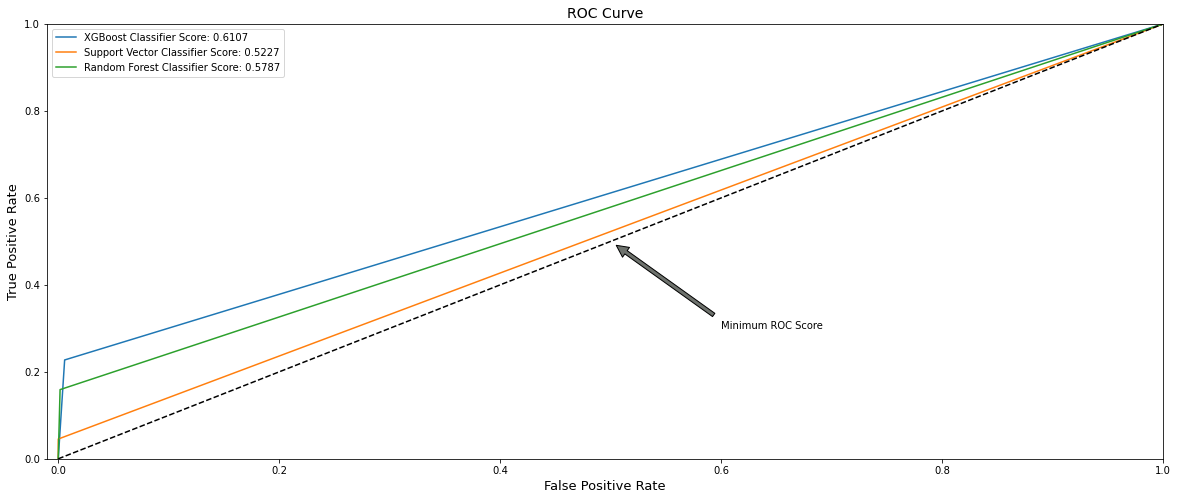

In [27]:
#roc score plot
from sklearn.metrics import roc_curve

rfc_fpr, rfc_tpr, rfc_threshold = roc_curve(y_test, y_rfc_pred)
svc_fpr, svc_tpr, svc_thresold = roc_curve(y_test, y_svc_pred)
xgb_fpr, xgb_tpr, xgb_thresold = roc_curve(y_test, y_xgb_pred)


def graph_roc_curve_multiple(rfc_fpr, rfc_tpr,svc_fpr, svc_tpr, xgb_fpr, xgb_tpr):
    plt.figure(figsize=(20,8))
    plt.title('ROC Curve', fontsize=14)
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_xgb_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_svc_pred)))
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_rfc_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rfc_fpr, rfc_tpr, svc_fpr, svc_tpr, xgb_fpr, xgb_tpr)
plt.show()

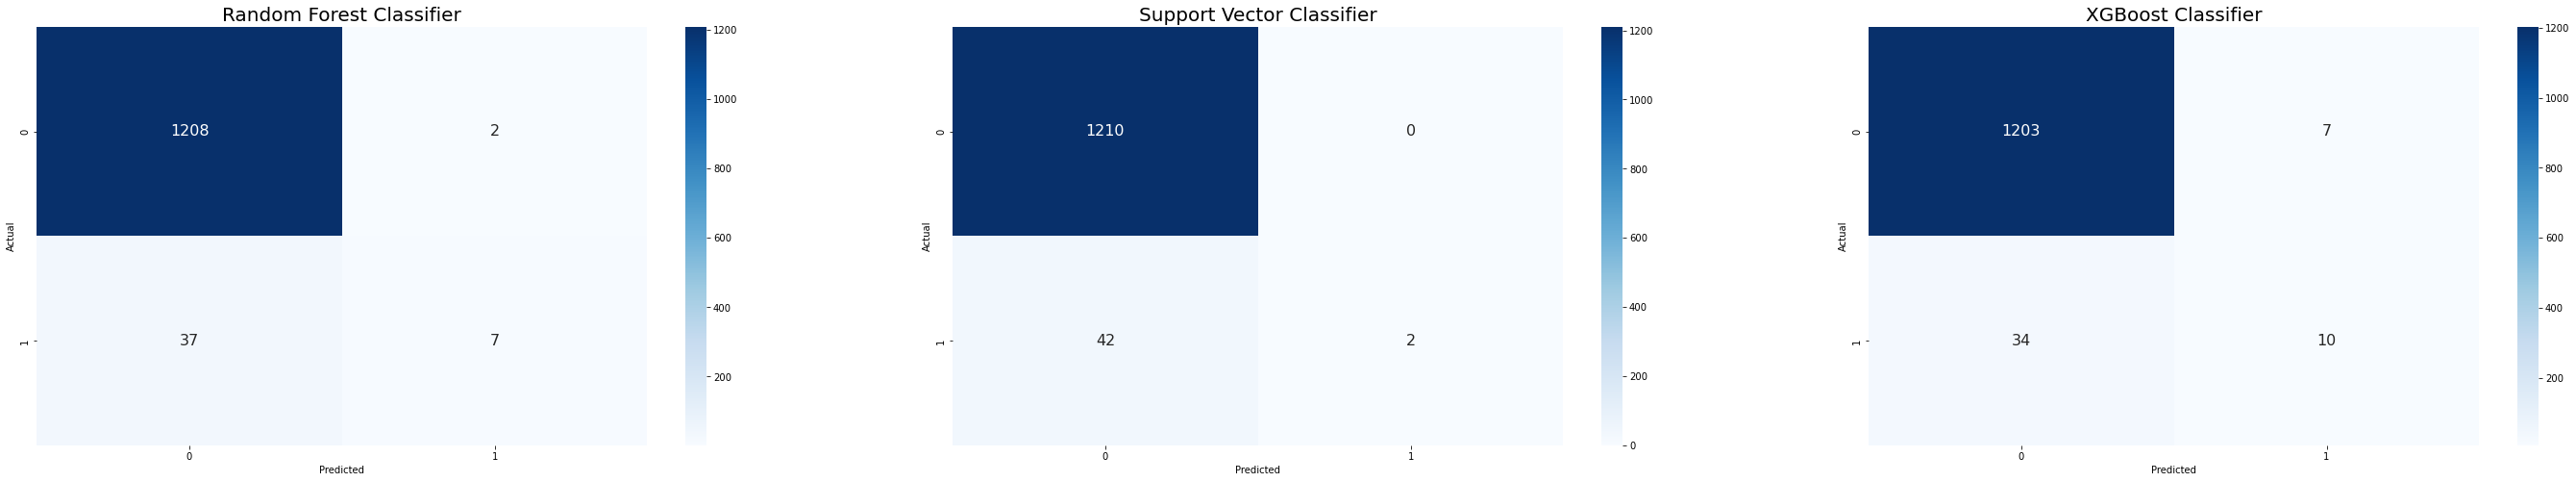

In [28]:
#confusion matrix plot

conf_mx1 = confusion_matrix(y_test,y_rfc_pred)
conf_mx2 = confusion_matrix(y_test,y_svc_pred)
conf_mx3 = confusion_matrix(y_test,y_xgb_pred)

heat_cm1 = pd.DataFrame(conf_mx1, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm1.index.name = 'Actual'
heat_cm1.columns.name = 'Predicted'

heat_cm2 = pd.DataFrame(conf_mx2, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm2.index.name = 'Actual'
heat_cm2.columns.name = 'Predicted'

heat_cm3 = pd.DataFrame(conf_mx3, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm3.index.name = 'Actual'
heat_cm3.columns.name = 'Predicted'

f, ax = plt.subplots(1, 3, figsize=(20,8))
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(heat_cm1, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[0])
ax[0].set_title('Random Forest Classifier', fontsize = 20)
sns.heatmap(heat_cm2, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[1])
ax[1].set_title('Support Vector Classifier', fontsize = 20)
sns.heatmap(heat_cm3, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g', ax = ax[2])
ax[2].set_title('XGBoost Classifier', fontsize = 20)

plt.show()

### Result:
From the 3 models that are used to predict corporate default, XGBoost Classifier gives the best result with the highest F1-Score
However, there are still rooms for improvement for the model as it still has low recall score (low ability to predict true positive cases or the Default cases)